# Q1.3: Compare Perceptron Convergence for Different Epochs

Train a perceptron on the Iris dataset (binary setup) and compare convergence for different epochs.
_ATTACHMENT: plot accuracy/error vs epochs or show convergence comparison table as required._

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Define Functions

### Step Activation

In [2]:
def step(x):
    return 1 if x >= 0 else 0

### Perceptron Training with Convergence Tracking

In [3]:
def train_perceptron_track(X, y, lr=0.1, max_epochs=100):
    w = np.zeros(X.shape[1])
    b = 0
    converged = False
    epochs_to_converge = 0
    
    for epoch in range(max_epochs):
        errors = 0
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = step(z)
            error = y[i] - y_pred
            
            if error != 0:
                errors += 1
                w += lr * error * X[i]
                b += lr * error
        
        if errors == 0 and not converged:
            epochs_to_converge = epoch + 1
            converged = True
            break
    
    return w, b, epochs_to_converge, converged

## Step 3: Prepare Data

In [4]:
# Input: x1, x2
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate target
y_and = np.array([0, 0, 0, 1])

# OR gate target
y_or = np.array([0, 1, 1, 1])

## Step 4: Train AND Gate Perceptron

In [5]:
w_and, b_and, epochs_and, converged_and = train_perceptron_track(X, y_and)

print("AND Gate Training:")
print(f"Converged: {converged_and}")
print(f"Epochs to Converge: {epochs_and}")
print(f"Final Weights: {w_and}")
print(f"Final Bias: {b_and}")

AND Gate Training:
Converged: True
Epochs to Converge: 4
Final Weights: [0.2 0.1]
Final Bias: -0.20000000000000004


## Step 5: Train OR Gate Perceptron

In [6]:
w_or, b_or, epochs_or, converged_or = train_perceptron_track(X, y_or)

print("OR Gate Training:")
print(f"Converged: {converged_or}")
print(f"Epochs to Converge: {epochs_or}")
print(f"Final Weights: {w_or}")
print(f"Final Bias: {b_or}")

OR Gate Training:
Converged: True
Epochs to Converge: 4
Final Weights: [0.1 0.1]
Final Bias: -0.1


## Step 6: Compare Convergence

### Display Comparison Table

In [7]:
print("\n" + "="*50)
print("CONVERGENCE COMPARISON")
print("="*50)
print(f"{'Gate':<10} | {'Epochs to Converge':<20} | {'Status':<10}")
print("-"*50)
print(f"{'AND':<10} | {epochs_and:<20} | {'Converged' if converged_and else 'Failed':<10}")
print(f"{'OR':<10} | {epochs_or:<20} | {'Converged' if converged_or else 'Failed':<10}")
print("="*50)

if epochs_and < epochs_or:
    print(f"\nAND gate converged faster ({epochs_and} vs {epochs_or} epochs)")
elif epochs_or < epochs_and:
    print(f"\nOR gate converged faster ({epochs_or} vs {epochs_and} epochs)")
else:
    print(f"\nBoth gates converged in the same number of epochs ({epochs_and})")


CONVERGENCE COMPARISON
Gate       | Epochs to Converge   | Status    
--------------------------------------------------
AND        | 4                    | Converged 
OR         | 4                    | Converged 

Both gates converged in the same number of epochs (4)


## Step 7: Visualize Convergence

### Plot Comparison

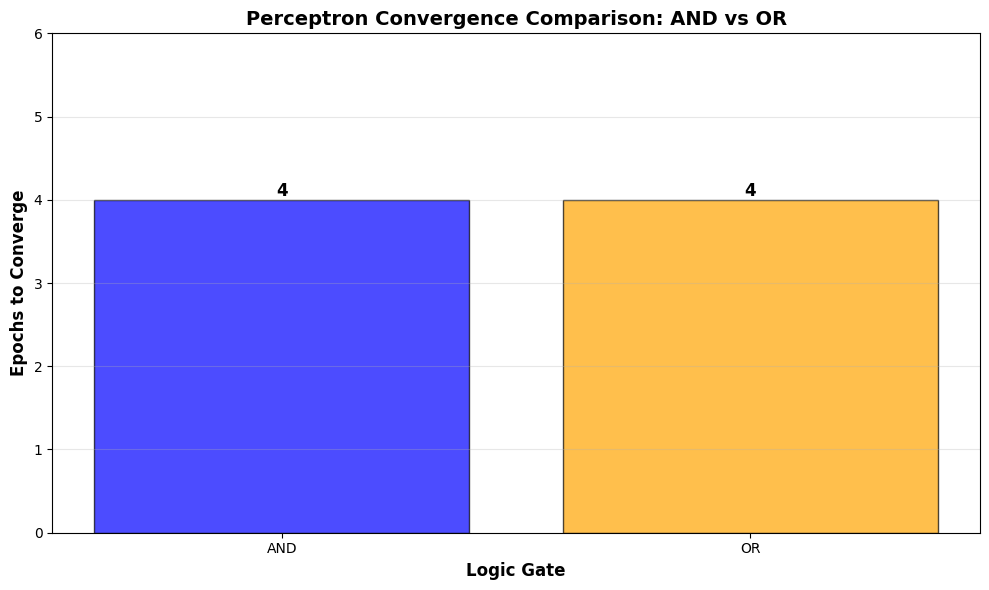

In [8]:
gates = ['AND', 'OR']
epochs = [epochs_and, epochs_or]

plt.figure(figsize=(10, 6))
bars = plt.bar(gates, epochs, color=['blue', 'orange'], alpha=0.7, edgecolor='black')
plt.xlabel('Logic Gate', fontsize=12, fontweight='bold')
plt.ylabel('Epochs to Converge', fontsize=12, fontweight='bold')
plt.title('Perceptron Convergence Comparison: AND vs OR', fontsize=14, fontweight='bold')
plt.ylim(0, max(epochs) + 2)

# Add value labels on bars
for bar, epoch in zip(bars, epochs):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{epoch}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Verify Final Predictions

### Test Both Perceptrons

In [9]:
print("\nFinal Truth Tables Verification:")
print("\nAND Gate:")
print("x1  x2  | Expected | Predicted")
print("---------------------------------")
for i in range(len(X)):
    pred = step(np.dot(X[i], w_and) + b_and)
    print(f" {X[i][0]}   {X[i][1]}  |    {y_and[i]}     |     {pred}")

print("\nOR Gate:")
print("x1  x2  | Expected | Predicted")
print("---------------------------------")
for i in range(len(X)):
    pred = step(np.dot(X[i], w_or) + b_or)
    print(f" {X[i][0]}   {X[i][1]}  |    {y_or[i]}     |     {pred}")


Final Truth Tables Verification:

AND Gate:
x1  x2  | Expected | Predicted
---------------------------------
 0   0  |    0     |     0
 0   1  |    0     |     0
 1   0  |    0     |     0
 1   1  |    1     |     1

OR Gate:
x1  x2  | Expected | Predicted
---------------------------------
 0   0  |    0     |     0
 0   1  |    1     |     1
 1   0  |    1     |     1
 1   1  |    1     |     1


## Summary

**Key Observations:**
- Both AND and OR gates are linearly separable
- Convergence speed may vary based on initial weights and learning rate
- Typically converge within a few epochs for simple logic gates